# Empirical constraints: an overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *
import seaborn as sns

C:\Users\sbezo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dtypes={"Label":str, "rho0":np.float64, "E/aA": np.float64}
data_skyrme=pd.read_csv("data/satpoints_skyrme.csv", comment="#", dtype=dtypes)
data_rmf=pd.read_csv("data/satpoints_rmf.csv", comment="#", dtype=dtypes)
data_FC1=pd.read_csv("data/forChristan_samples1.csv",comment="#", names=["rho0","E/A"])
data_FC2=pd.read_csv("data/forChristan_samples2.csv",comment="#", names=["rho0","E/A"])
data_FC3=pd.read_csv("data/forChristan_samples3.csv",comment="#", names=["rho0","E/A"])

def import_fwf_data(filepath, column_name):
    data = pd.read_fwf(filepath, skiprows=7, comment='#', usecols=column_name)
    return data.rename(columns={column_name[0]:"rho0", column_name[1]:"E/A"})
                       
data_RMF012_1 = import_fwf_data("saturation/RMF012/CovEllipse.out", ["A39","B39"])
data_RMF012_2 = import_fwf_data("saturation/RMF012/CovEllipse.out", ["A95","B95"])
data_RMF016_1 = import_fwf_data("saturation/RMF016/CovEllipse.out", ["A39","B39"])
data_RMF016_2 = import_fwf_data("saturation/RMF016/CovEllipse.out", ["A95","B95"])
data_RMF022_1 = import_fwf_data("saturation/RMF022/CovEllipse.out", ["A39","B39"])
data_RMF022_2 = import_fwf_data("saturation/RMF022/CovEllipse.out", ["A95","B95"])
data_RMF028_1 = import_fwf_data("saturation/RMF028/CovEllipse.out", ["A39","B39"])
data_RMF028_2 = import_fwf_data("saturation/RMF028/CovEllipse.out", ["A95","B95"])
data_RMF032_1 = import_fwf_data("saturation/RMF032/CovEllipse.out", ["A39","B39"])
data_RMF032_2 = import_fwf_data("saturation/RMF032/CovEllipse.out", ["A95","B95"])

def insert_type(typename, data):
    data["type"]=typename
    return data


insert_type("Skyrme", data_skyrme)
insert_type("RMF", data_rmf)


def insert_type_and_label(typename, labelname, data):
    data["type"]=typename
    data["Label"]=labelname
    return data

insert_type_and_label("Schunck", "UNDEF", data_FC1)
insert_type_and_label("Schunck", "UNDEF", data_FC2)
insert_type_and_label("Schunck", "UNDEF", data_FC3)
insert_type_and_label("RMF012", "temp", data_RMF012_1)
insert_type_and_label("RMF012", "temp", data_RMF012_2)
insert_type_and_label("RMF016", "temp", data_RMF016_1)
insert_type_and_label("RMF016", "temp", data_RMF016_2)
insert_type_and_label("RMF022", "temp", data_RMF022_1)
insert_type_and_label("RMF022", "temp", data_RMF022_2)
insert_type_and_label("RMF028", "temp", data_RMF028_1)
insert_type_and_label("RMF028", "temp", data_RMF028_2)
insert_type_and_label("RMF032", "temp", data_RMF032_1)
insert_type_and_label("RMF032", "temp", data_RMF032_2)



data=pd.concat([data_skyrme, data_rmf, data_FC1, data_FC2, data_FC3, data_RMF012_1, data_RMF012_2, data_RMF016_1, data_RMF016_2, data_RMF022_1, data_RMF022_2, data_RMF028_1, data_RMF028_2, data_RMF032_1, data_RMF032_2])

data.head(n=10000)

,Label,rho0,E/A,type
0,SLy4,0.160000,-15.972000,Skyrme
1,UNEDF0,0.160530,-16.056000,Skyrme
2,UNEDF1,0.158710,-15.800000,Skyrme
3,UNEDF2,0.156310,-15.800000,Skyrme
4,KDE0v1,0.165000,-16.230000,Skyrme
...,...,...,...,...
3976,UNDEF,0.155594,-15.714904,Schunck
3977,UNDEF,0.155445,-15.731806,Schunck
3978,UNDEF,0.155052,-15.755521,Schunck
3979,UNDEF,0.155543,-15.802464,Schunck


## Plot the data

Text(0, 0.5, 'Saturation Energy $E_0/A$ [MeV]')

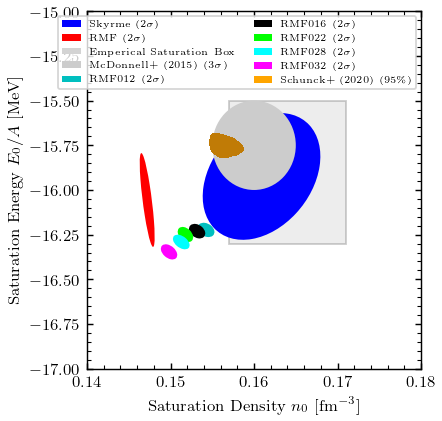

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8.6*cm, 8.2*cm), constrained_layout=True)

legend_elements=[]
for imodel,model in enumerate(("Skyrme", "RMF")):
    masked_data=data[data["type"]==model]
    color=colorset[imodel]
    confidence_ellipse(masked_data["rho0"], masked_data["E/A"], 
                       ax, n_std=2.0, facecolor=color, show_scatter=True)
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"{model} (2$\\sigma$)"))
    

plot_empirical_saturation(ax=ax, zorder=-3)

color=facecolor="0.8"

confidence_ellipse_mean_cov(np.array([np.mean([0.155,0.165]),np.mean([-16, -15.5])]), np.diag([0.005,0.25])**2, 
                            ax=ax, n_std=1, facecolor="0.8")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"McDonnell+ (2015) (3$\\sigma$)"))
# 0.155 ≤ ρc ≤ 0.165 (fm−3 ); −16.0 ≤ E NM /A ≤ −15.5 (MeV);

def hartree_code(filepath):
    data = pd.read_fwf(filepath, comment='#', header=None)
    data_str = (data.loc[2,0])
    data_val = data_str.strip('][').split(', ')
    A_mean = float(data_val[0])
    B_mean = float(data_val[1])
    Cov = float(data_val[2])*float(data_val[3])*float(data_val[4])
    A_std = float(data_val[2])
    B_std = float(data_val[3])
    return (A_mean, B_mean, Cov, A_std, B_std)

A_12, B_12, Cov_12, A_std_12, B_std_12 = hartree_code("saturation/RMF012/CovEllipse.com")
A_16, B_16, Cov_16, A_std_16, B_std_16 = hartree_code("saturation/RMF016/CovEllipse.com")
A_22, B_22, Cov_22, A_std_22, B_std_22 = hartree_code("saturation/RMF022/CovEllipse.com")
A_28, B_28, Cov_28, A_std_28, B_std_28 = hartree_code("saturation/RMF028/CovEllipse.com") 
A_32, B_32, Cov_32, A_std_32, B_std_32 = hartree_code("saturation/RMF032/CovEllipse.com") 

confidence_ellipse_mean_cov(np.array([A_12, B_12]), np.array([[A_std_12**2, Cov_12],[Cov_12, B_std_12**2]]),
                           ax=ax, n_std=2, facecolor="c")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="c", label=f"RMF012 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([A_16, B_16]), np.array([[A_std_16**2, Cov_16],[Cov_16, B_std_16**2]]),
                           ax=ax, n_std=2, facecolor="k")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="k", label=f"RMF016 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([A_22, B_22]), np.array([[A_std_22**2, Cov_22],[Cov_22, B_std_22**2]]),
                           ax=ax, n_std=2, facecolor="lime")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="lime", label=f"RMF022 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([A_28, B_28]), np.array([[A_std_28**2, Cov_28],[Cov_28, B_std_28**2]]),
                           ax=ax, n_std=2, facecolor="aqua")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="aqua", label=f"RMF028 (2$\\sigma$)"))

confidence_ellipse_mean_cov(np.array([A_32, B_32]), np.array([[A_std_32**2, Cov_32],[Cov_32, B_std_32**2]]),
                           ax=ax, n_std=2, facecolor="magenta")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="magenta", label=f"RMF032 (2$\\sigma$)"))

def plotkde(filename):
    data1 = np.loadtxt(filename, delimiter=',', skiprows=1)
    sns.kdeplot(x=data1[:,0], y=data1[:,1], fill=True, levels=[.05,1], color="orange")
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="orange", label=f"Schunck+ (2020) (95\%)"))   
     
plotkde("data/forChristan_samples1.csv")
#plotkde("data/forChristan_samples2.csv")
#plotkde("data/forChristan_samples3.csv")

ax.legend(handles=legend_elements, loc='best', fontsize='xx-small', ncol=2)
#ax.axvspan(.155,.165,alpha=.2)
ax.set_xlim(0.14, 0.18)
ax.set_ylim(-17, -15.)
ax.set_xlabel('Saturation Density $n_0$ [fm$^{-3}$]')
ax.set_ylabel('Saturation Energy $E_0/A$ [MeV]')
#fig.savefig("saturation.pdf")